In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [67]:
data=pd.read_csv("diabetes.csv")
data.head(4)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
data.groupby("Outcome").mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [12]:
#we can see people with more age tend to have diabetes

#  Data Cleaning 
check if the data is biased by checking the outcome and checking how many null values are there

In [5]:
data.isnull().values.any()

False

In [6]:
data.drop_duplicates()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# data visualization

In [9]:
data["outcome"]=np.where(data["Outcome"]==1,"Diabetic","No Diabetic")

c:\users\chanc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


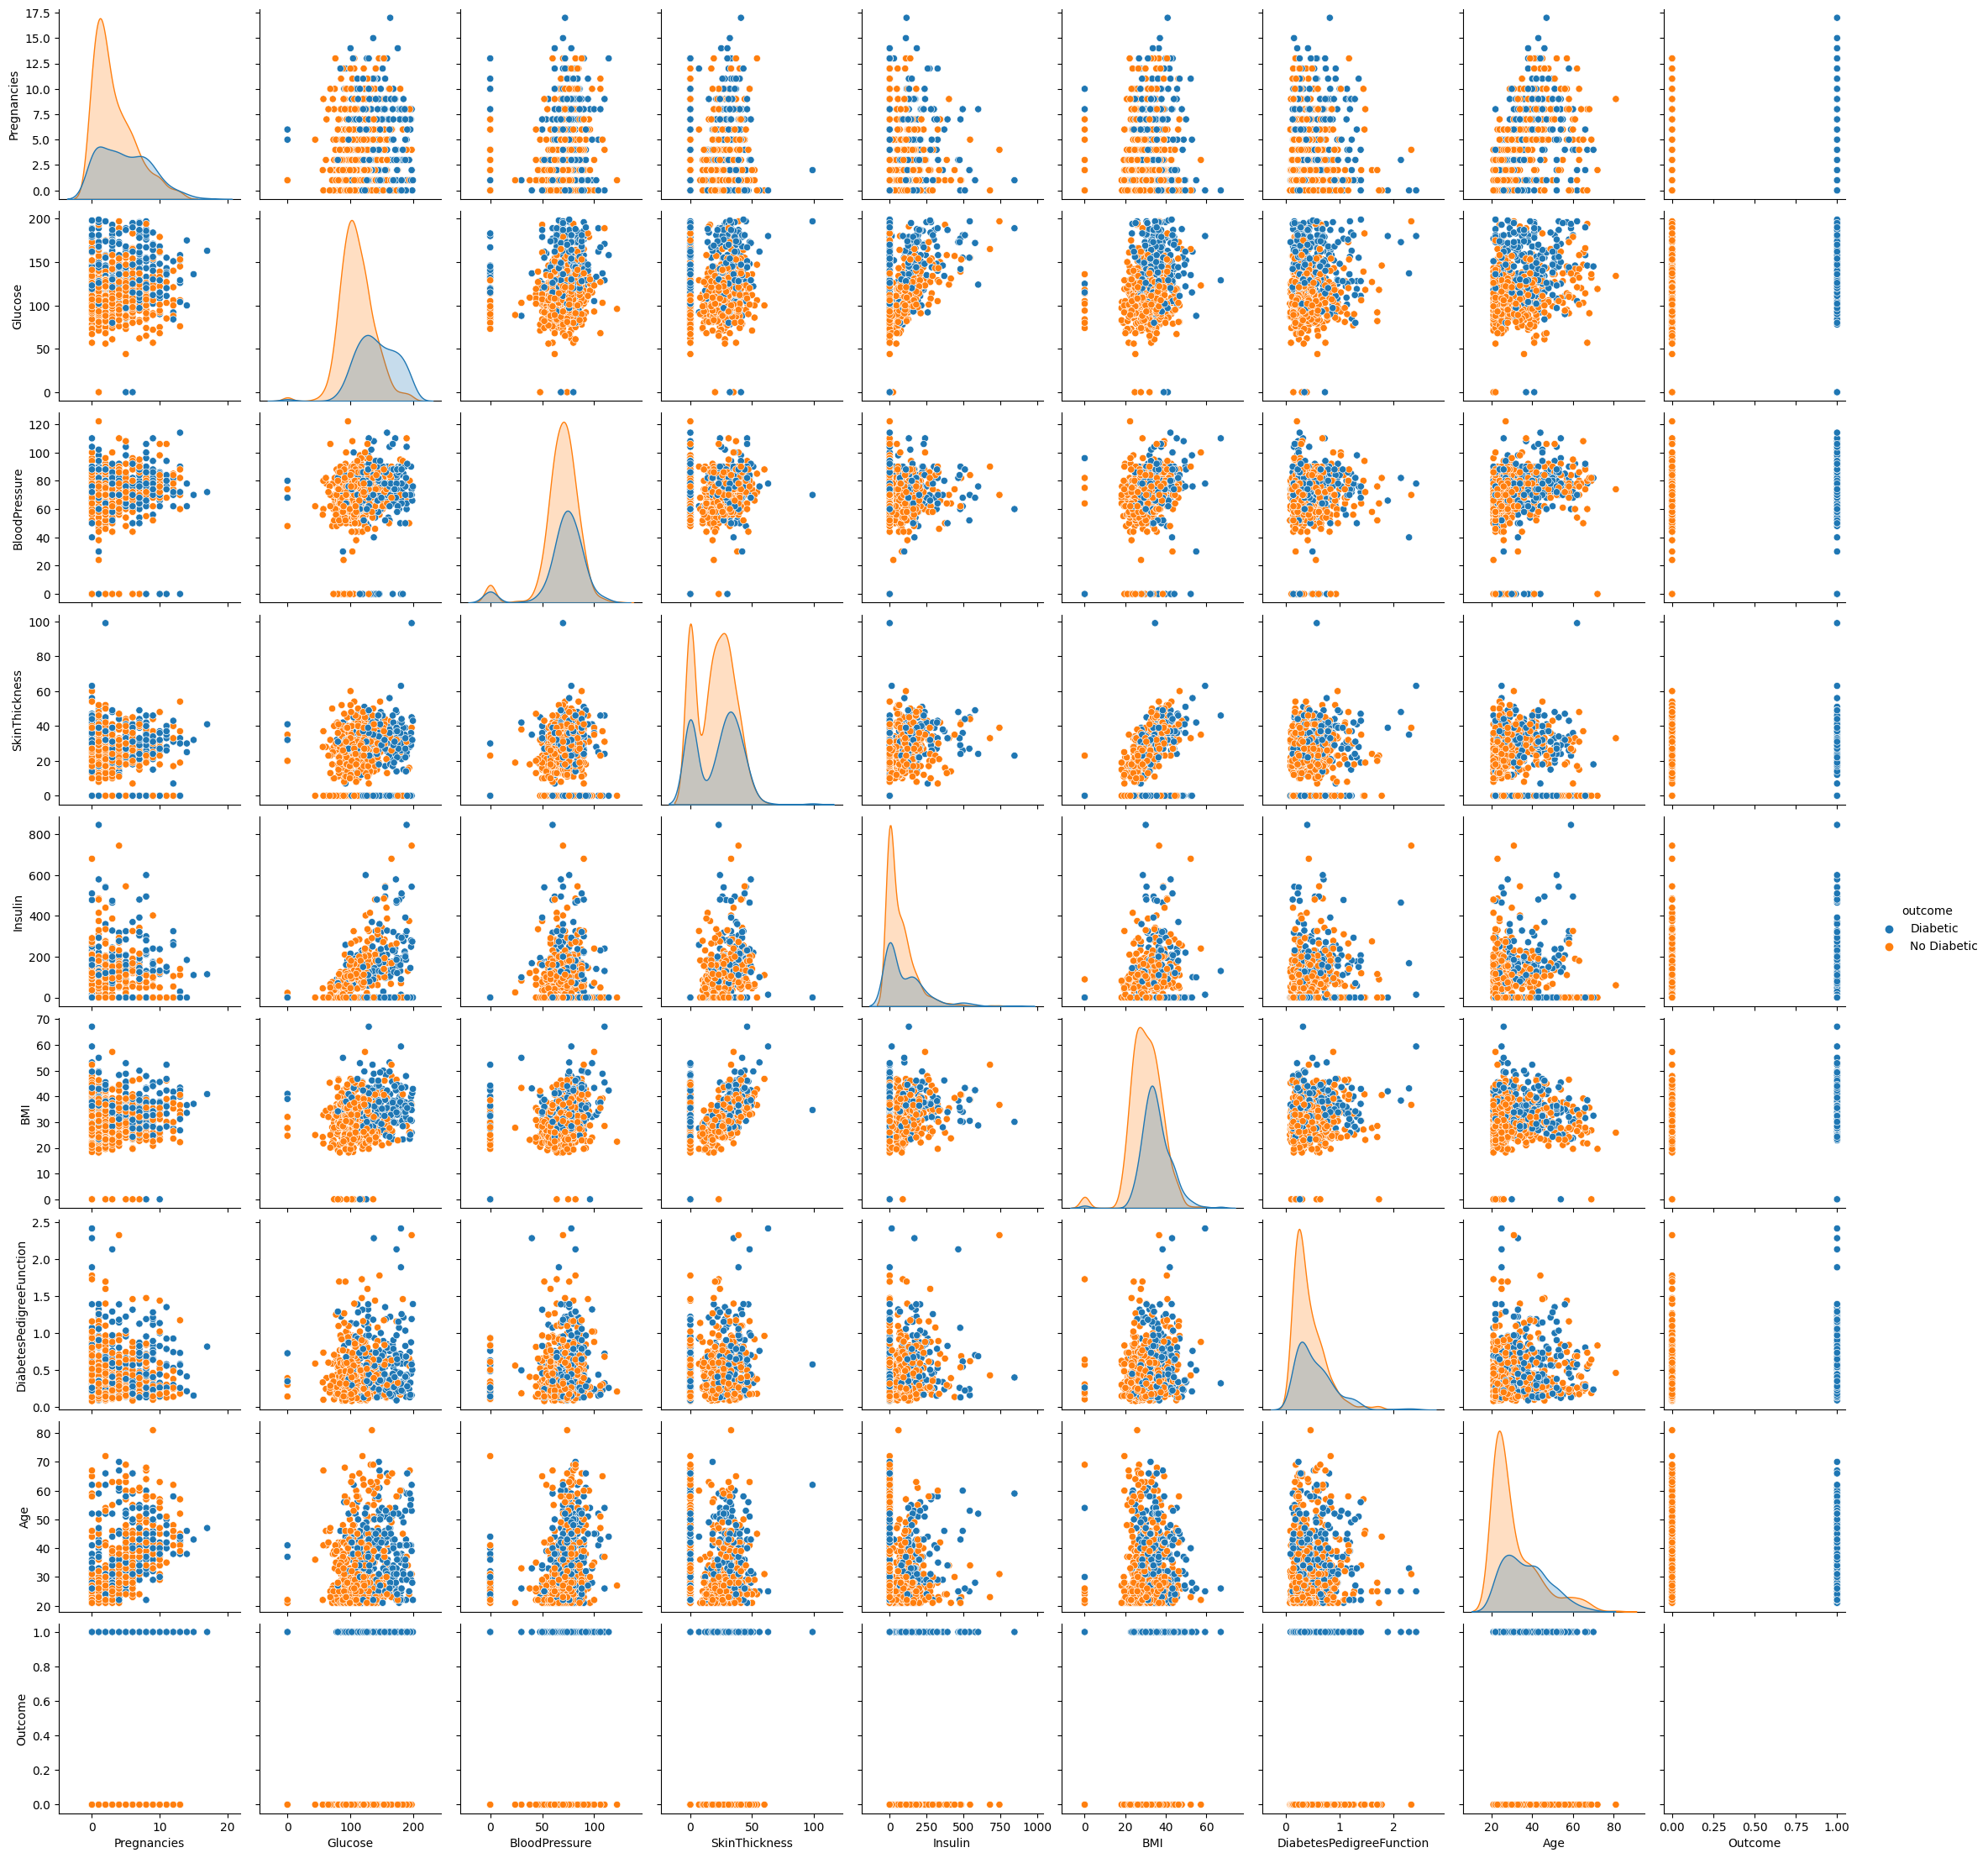

In [11]:
sns.pairplot(data,hue="outcome")

C:\Users\chanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


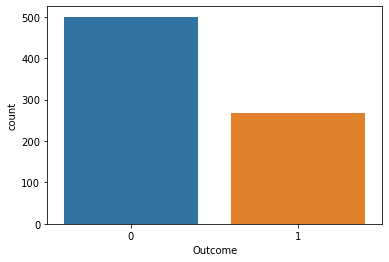

In [35]:
sns.countplot('Outcome',data=data)


# Show the plot
plt.show()

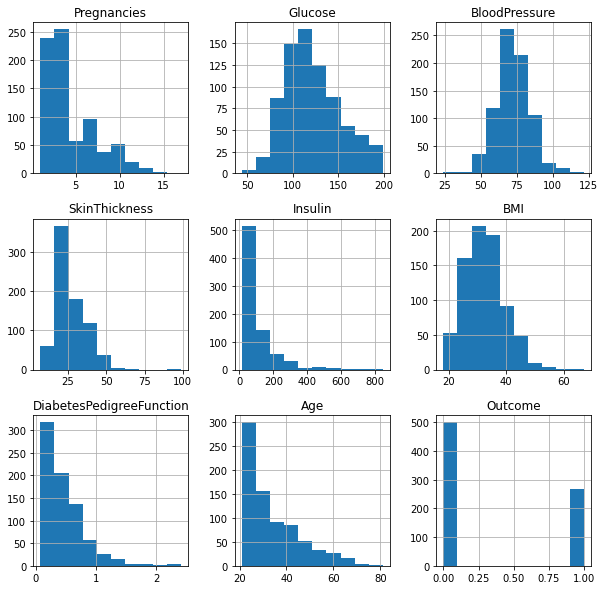

In [37]:

#histogram represent graph for each feature
data.hist(bins=10,figsize=(10,10))
plt.show()

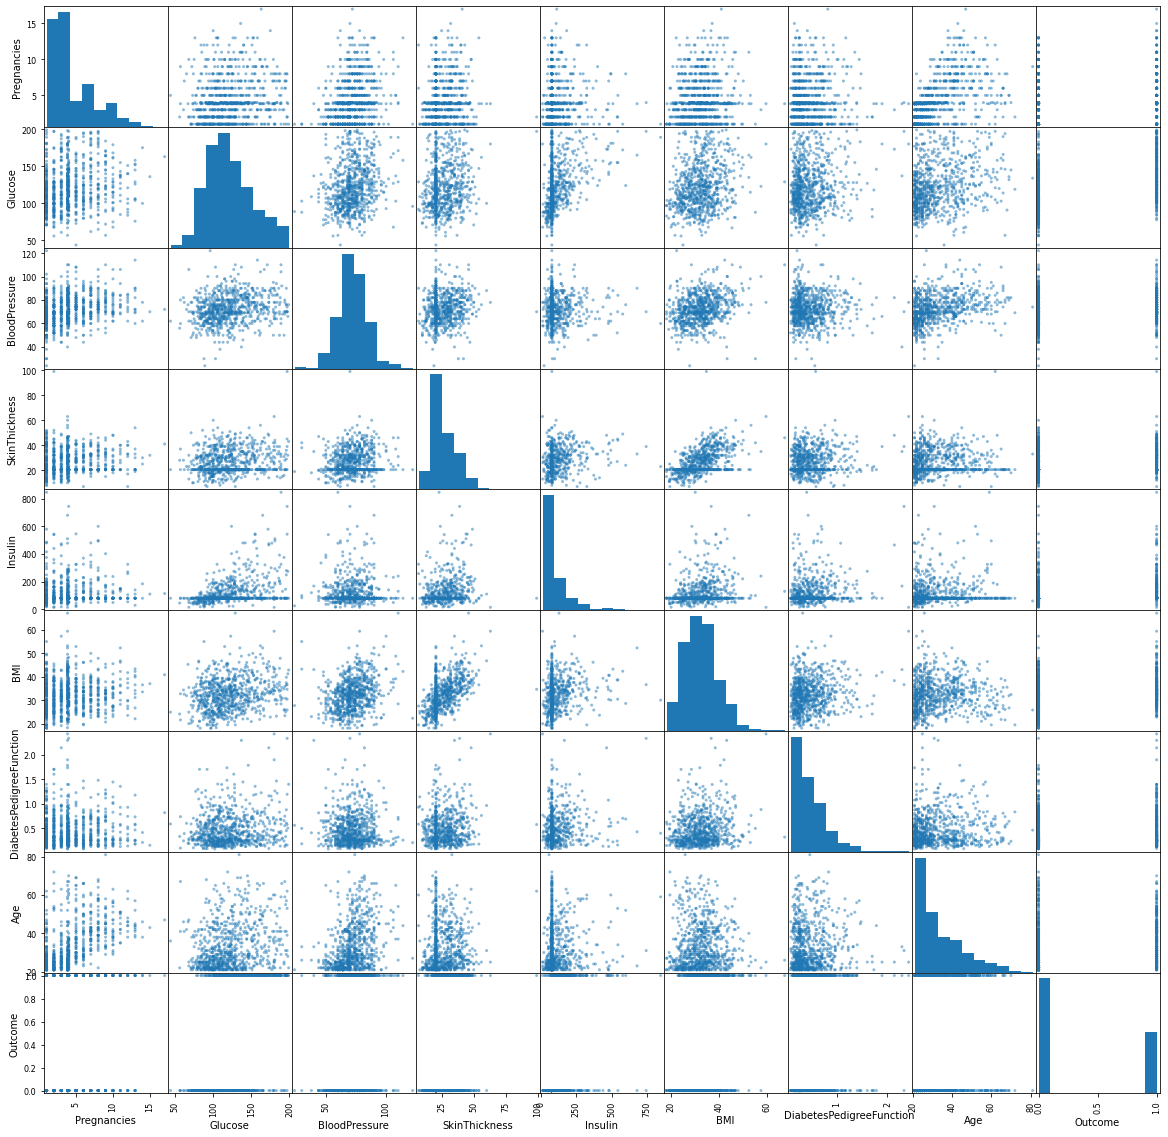

In [38]:
#scatterplot is used to understand relationship between two features.
from pandas.plotting import scatter_matrix
scatter_matrix(data ,figsize =(20,20));

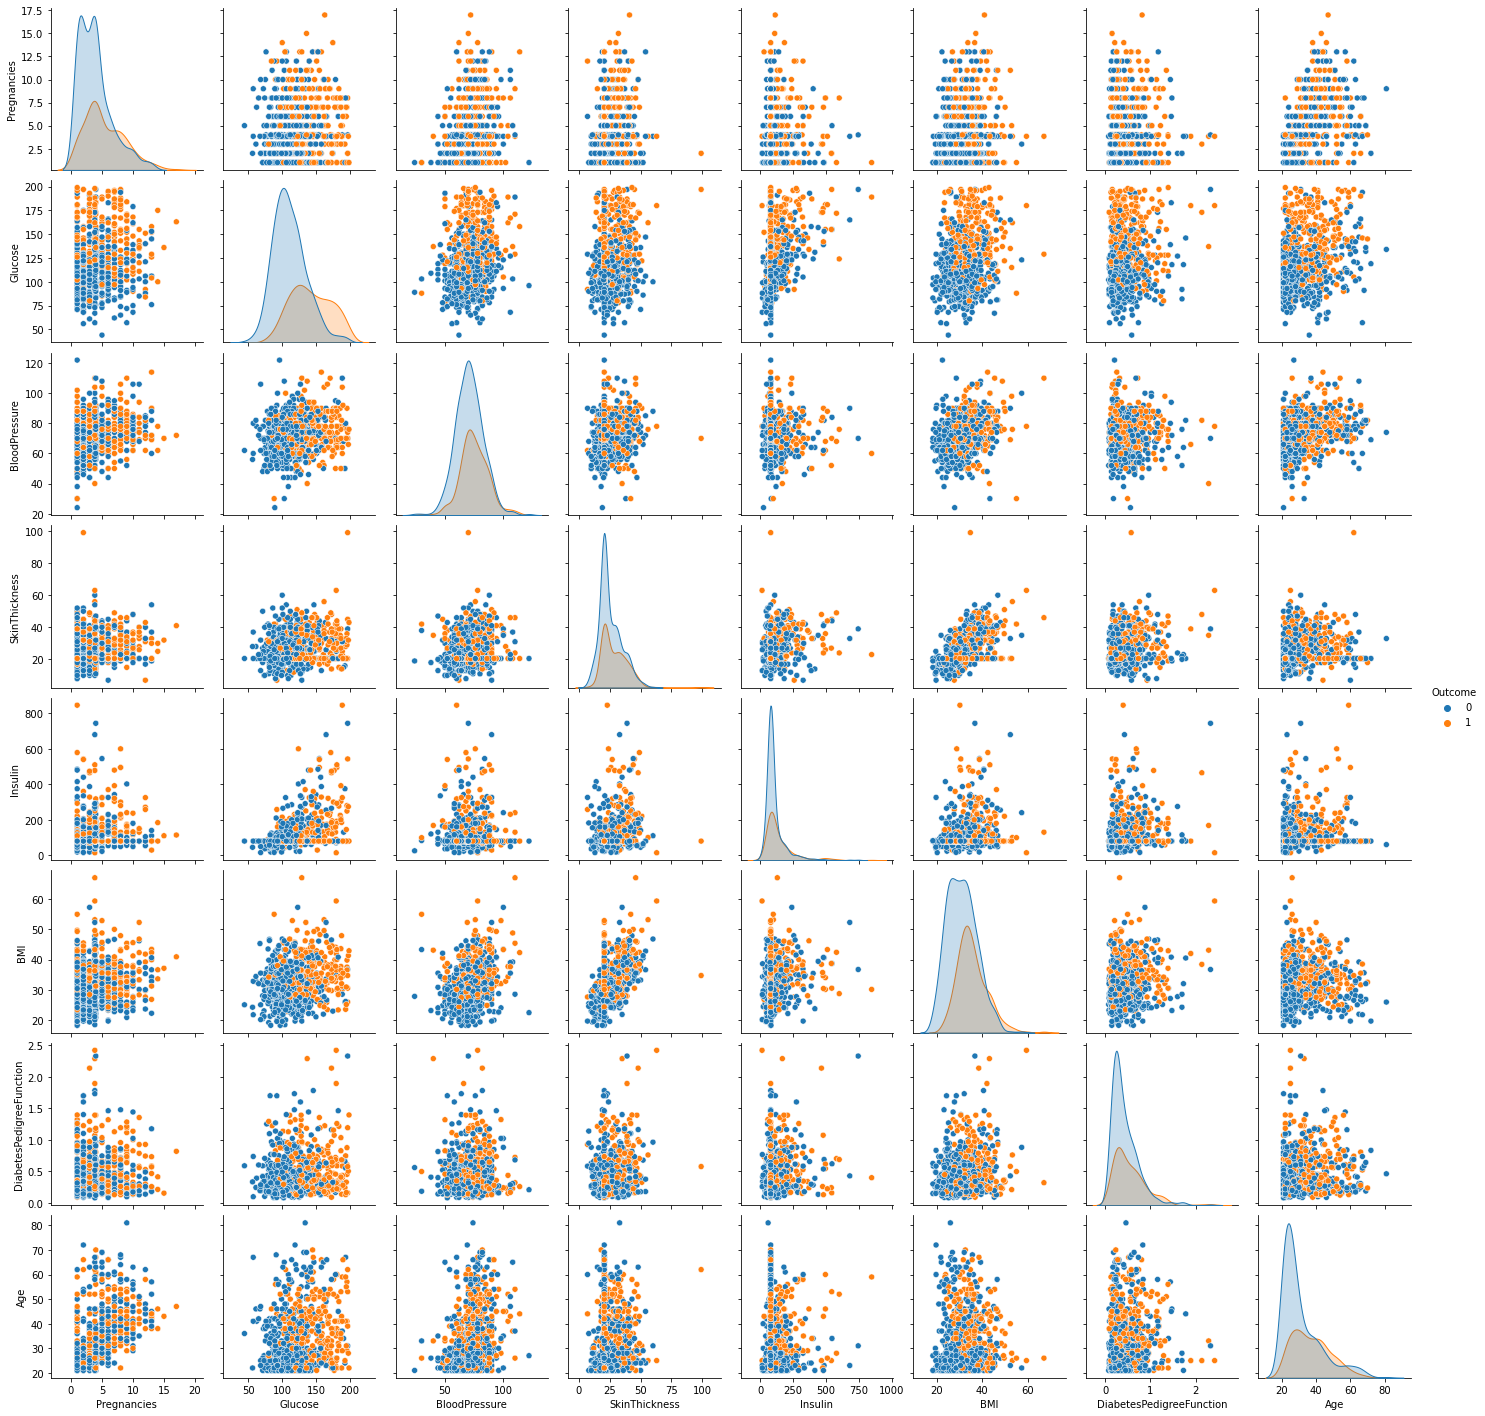

In [40]:
#using pairplot
sns.pairplot(data=data,hue='Outcome')
plt.show()

# finding the correlation between features

In [10]:
data.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

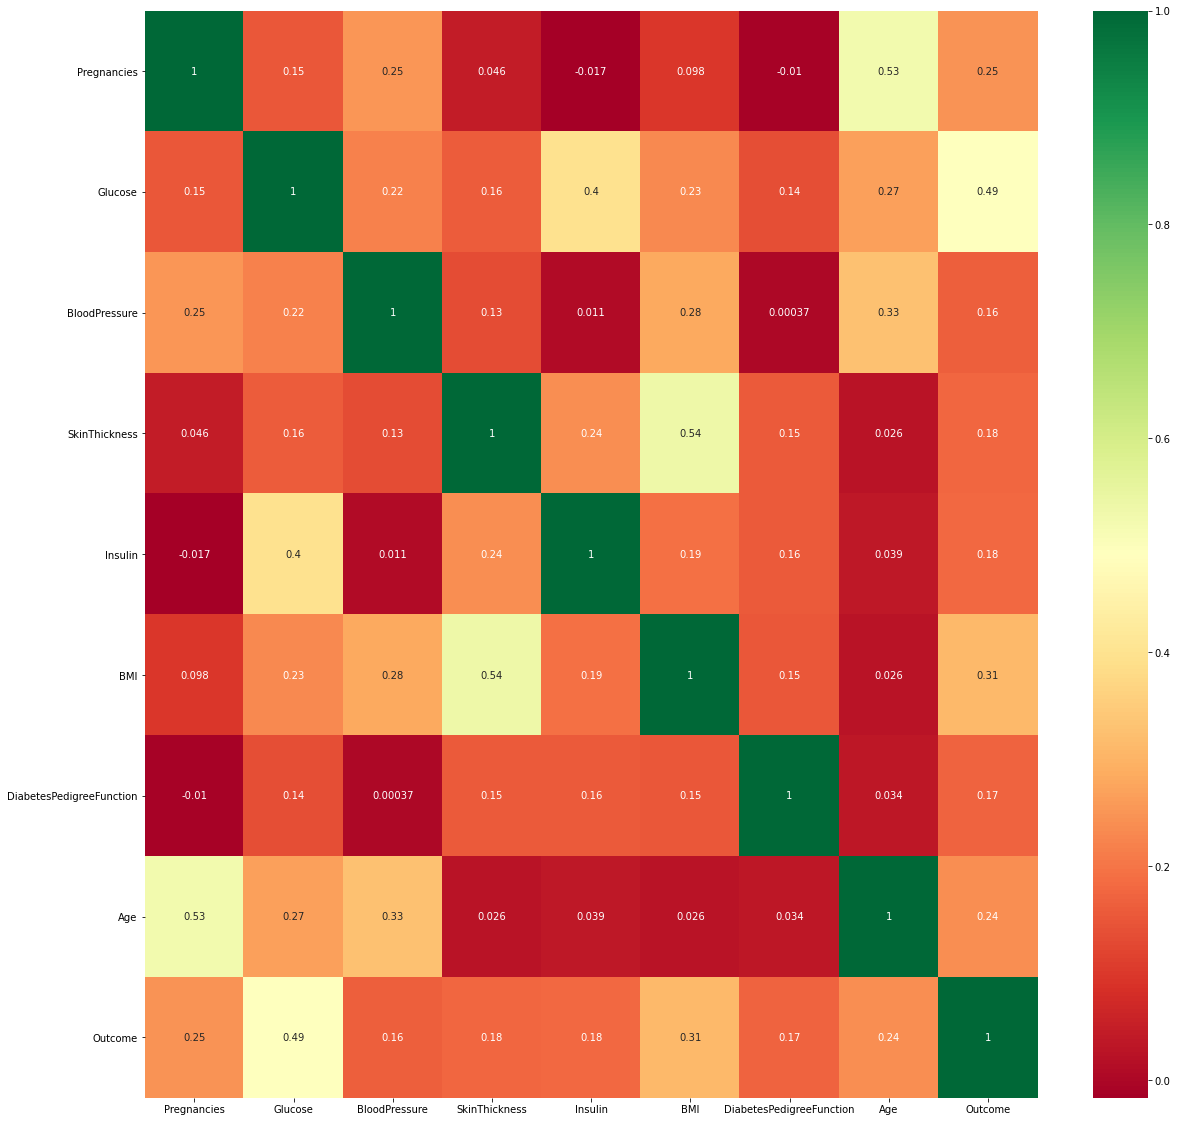

In [42]:
import seaborn as sns
cor=data.corr()
top_corr_features=cor.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [12]:
#check whether the dataset is balanced or not
diabetes_true=len(data.loc[data['Outcome']== True])
diabets_false=len(data.loc[data['Outcome']== False])

In [68]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [69]:
X=data.drop('Outcome',axis=1).values### independent features
y=data['Outcome'].values###dependent features

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [11]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
X_train

array([[0.00e+00, 1.62e+02, 7.60e+01, ..., 5.32e+01, 7.59e-01, 2.50e+01],
       [2.00e+00, 8.70e+01, 0.00e+00, ..., 2.89e+01, 7.73e-01, 2.50e+01],
       [0.00e+00, 1.37e+02, 6.80e+01, ..., 2.48e+01, 1.43e-01, 2.10e+01],
       ...,
       [3.00e+00, 1.16e+02, 7.40e+01, ..., 2.63e+01, 1.07e-01, 2.40e+01],
       [1.00e+00, 8.80e+01, 3.00e+01, ..., 5.50e+01, 4.96e-01, 2.60e+01],
       [5.00e+00, 9.60e+01, 7.40e+01, ..., 3.36e+01, 9.97e-01, 4.30e+01]])

In [21]:
#creating tensors

X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [45]:
#creating model with pytorch

class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [46]:
#instantinate my model
torch.manual_seed(20)
model=ANN_model()

In [47]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [48]:
##backward propogation--Define the loss function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [49]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("epoch_num :{} and the loss:{}".format(i,loss.item()))
    #to reduce the loss function
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch_num :1 and the loss:3.621767044067383
epoch_num :11 and the loss:0.8049079179763794
epoch_num :21 and the loss:0.5988363027572632
epoch_num :31 and the loss:0.6021443009376526
epoch_num :41 and the loss:0.5752024054527283
epoch_num :51 and the loss:0.5649778842926025
epoch_num :61 and the loss:0.5556989312171936
epoch_num :71 and the loss:0.5469976663589478
epoch_num :81 and the loss:0.5390197038650513
epoch_num :91 and the loss:0.5318740606307983
epoch_num :101 and the loss:0.5257030725479126
epoch_num :111 and the loss:0.5211361050605774
epoch_num :121 and the loss:0.5143359303474426
epoch_num :131 and the loss:0.5080028176307678
epoch_num :141 and the loss:0.5017679333686829
epoch_num :151 and the loss:0.49531465768814087
epoch_num :161 and the loss:0.48821699619293213
epoch_num :171 and the loss:0.48185601830482483
epoch_num :181 and the loss:0.47438451647758484
epoch_num :191 and the loss:0.46871042251586914
epoch_num :201 and the loss:0.4655955135822296
epoch_num :211 and t

In [50]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

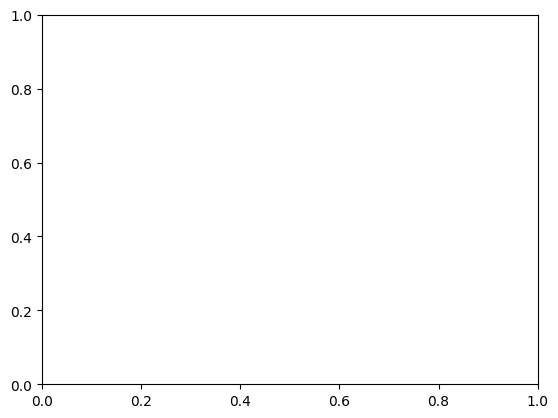

In [52]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [56]:
#prediction
predictions=[]
with torch.no_grad():
    for i,s in enumerate(X_test):
        y_pred=(model(s))
        predictions.append(y_pred.argmax().item())

In [57]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[86,  9],
       [26, 33]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

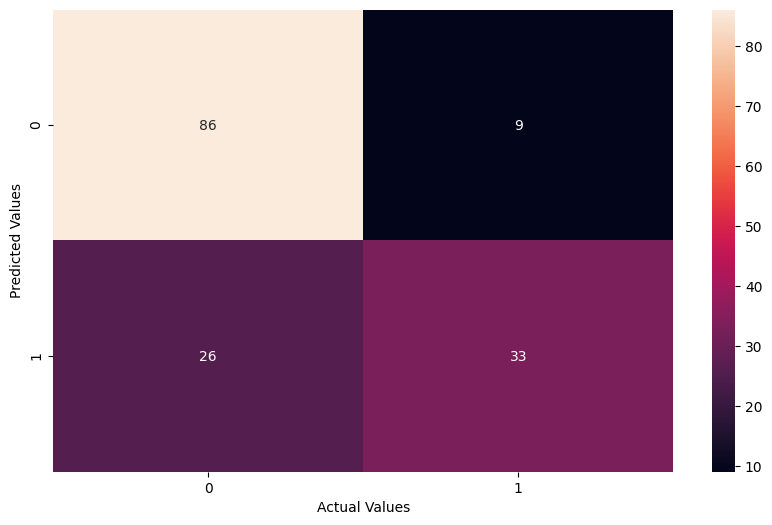

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [59]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7727272727272727

In [60]:
#save the model
torch.save(model,"diabetes.pt")

In [61]:
#how to load the model
model=torch.load("diabetes.pt")

In [62]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [71]:
### Predcition of new data point
list(data.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [72]:
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [74]:
new_data=torch.tensor(lst1)

In [75]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([0.8931, 0.9219])
1
